<a href="https://colab.research.google.com/github/OpenMindPB/BasicPython/blob/main/Not_concluded/New_data__week_Sales_week_abril_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
# bibliotecas usadas
#import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from google.colab import files

In [277]:
# para gerar o grafico no browser
%matplotlib inline

In [278]:
#clonar do Github
!git clone https://github.com/OpenMindPB/Data
%cd Data

Cloning into 'Data'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.
/content/Data/Data/Data/Data/Data/Data/Data/Data/Data/Data


In [279]:
df = pd.read_excel("Superstore_week.xlsx")

In [280]:
df.tail(3)

,Order Date,Ship Date,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,Sales week Average
2118,2017-12-29,2018-01-01,Consumer,Louisville,Kentucky,South,Furniture,Chairs,300.980,1,0.0,87.2842,2017,12,52,249479.032406,90410.5007,15447.443,215,33,236.132991
2119,2017-12-29,2018-01-01,Consumer,Louisville,Kentucky,South,Furniture,Chairs,258.750,3,0.0,77.6250,2017,12,52,249479.032406,90410.5007,15447.443,215,33,236.132991
2120,2017-12-30,2018-01-03,Consumer,New York City,New York,East,Furniture,Bookcases,323.136,4,0.2,12.1176,2017,12,52,249479.032406,90410.5007,15447.443,215,33,236.132991


In [281]:
print(df.columns)

Index(['Order Date', 'Ship Date', 'Segment', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Year', 'Month', 'Week', 'Year Sales', 'Month Sales', 'Week Sales',
       'Week Quantity ', 'Week Discout count', 'Sales week Average'],
      dtype='object')


In [282]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1
    return x

In [283]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [284]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y = furniture['Sales'].resample('W').mean()
names = y.index
y = y.reset_index()

In [285]:
y = furniture['Sales'].resample('W').mean()
w = furniture['Sales'].resample('W').mean()

In [286]:
w
import datetime
months = []
years  = []
weeks = []
for i in names:
  months.append(i.month)
  years.append(i.year)
  weeks.append(i.week)


In [287]:
Names =['Sales','Quantity','Discount','Profit','Year','Month','Week',
        'Year Sales','Month Sales','Week Sales','Week Quantity',
        'Week Discout count','Sales week Average']
Names =['Sales','Year','Month','Week',
        'Year Sales','Month Sales','Week Sales',
        'Week Discout count','Sales week Average']
N = len(Names)
M = y.shape[0]
dataframe = pd.DataFrame(np.zeros((M,N)),columns=Names)
k =0
for i in Names:
  furniture = df.loc[df['Category'] == 'Furniture']
  furniture = furniture.groupby('Order Date')[i].sum().reset_index()
  furniture = furniture.set_index('Order Date')
  y = furniture[i].resample('W').mean()
  dataframe[i] =pd.DataFrame(y.values)
  k = k+1

In [288]:
dataframe['Year']= years
dataframe['Month']= months
dataframe['Week'] = weeks

In [289]:
dataframe

,Sales,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Discout count,Sales week Average
0,678.107000,2014,1,2,1.571929e+05,25605.209600,7181.310000,5.000000,678.107000
1,312.618250,2014,1,3,1.964911e+05,32006.512000,3535.260500,9.000000,325.116036
2,551.986000,2014,1,4,4.715786e+05,76815.628800,17968.494000,24.000000,631.095486
3,311.833000,2014,2,5,1.571929e+05,25605.209600,9874.666000,8.000000,168.173200
4,14.560000,2014,2,6,1.571929e+05,8899.583000,3745.516000,5.000000,14.560000
...,...,...,...,...,...,...,...,...,...
203,2286.881714,2017,12,48,1.140476e+06,401825.836471,87043.009500,163.857143,2159.181658
204,1465.734000,2017,12,49,1.164235e+06,421915.669933,105316.269583,149.166667,1228.757873
205,773.303167,2017,12,50,7.900169e+05,286299.918883,56323.198083,61.000000,901.464683
206,1212.340500,2017,12,51,9.147565e+05,331505.169233,76836.788667,112.500000,1167.538484


In [290]:
DAT =dataframe.copy()
y = DAT['Sales']
y1 = y.shift(1)
y2 = y.shift(2)
y3 = y.shift(3)
y52=y.shift(52)
y51=y.shift(51)
y50=y.shift(50)
DAT.drop('Sales',axis='columns', inplace=True)

In [291]:
DAT['t-52']=y52;DAT['t-51']=y51;DAT['t-50']=y50;DAT['t-1']=y1;DAT['t-2']=y2;DAT['t-3']=y3;DAT['Sales']=y;
#DAT['t-1']=y1;DAT['t-2']=y2;DAT['t-3']=y3;DAT['Sales']=y;
#DAT.head()

In [292]:
DAT

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Discout count,Sales week Average,t-52,t-51,t-50,t-1,t-2,t-3,Sales
0,2014,1,2,1.571929e+05,25605.209600,7181.310000,5.000000,678.107000,NaN,NaN,NaN,NaN,NaN,NaN,678.107000
1,2014,1,3,1.964911e+05,32006.512000,3535.260500,9.000000,325.116036,NaN,NaN,NaN,678.107000,NaN,NaN,312.618250
2,2014,1,4,4.715786e+05,76815.628800,17968.494000,24.000000,631.095486,NaN,NaN,NaN,312.618250,678.107000,NaN,551.986000
3,2014,2,5,1.571929e+05,25605.209600,9874.666000,8.000000,168.173200,NaN,NaN,NaN,551.986000,312.618250,678.107000,311.833000
4,2014,2,6,1.571929e+05,8899.583000,3745.516000,5.000000,14.560000,NaN,NaN,NaN,311.833000,551.986000,312.618250,14.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2017,12,48,1.140476e+06,401825.836471,87043.009500,163.857143,2159.181658,869.623571,2056.510400,1169.541571,1152.482667,1029.662143,902.652286,2286.881714
204,2017,12,49,1.164235e+06,421915.669933,105316.269583,149.166667,1228.757873,2056.510400,1169.541571,1696.889500,2286.881714,1152.482667,1029.662143,1465.734000
205,2017,12,50,7.900169e+05,286299.918883,56323.198083,61.000000,901.464683,1169.541571,1696.889500,815.755600,1465.734000,2286.881714,1152.482667,773.303167
206,2017,12,51,9.147565e+05,331505.169233,76836.788667,112.500000,1167.538484,1696.889500,815.755600,903.205000,773.303167,1465.734000,2286.881714,1212.340500


In [293]:
DAT = DAT.dropna()

In [294]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [295]:
DAT.shape

(156, 15)

In [296]:
# separa os dados em treino e teste
#train=DAT.sample(frac=0.8,random_state=None) 
#test=DAT.drop(train.index)
test=DAT[DAT['Year'] == 1]
train=DAT.drop(test.index)

In [297]:
print(test.shape)
print(train.shape)

(53, 15)
(103, 15)


In [298]:
'''
total_rows = test.count
print(total_rows)
'''

'\ntotal_rows = test.count\nprint(total_rows)\n'

In [299]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[3,4,5,6,8,9,10,11,12,13]]
x_test=test.iloc[:,[3,4,5,6,8,9,10,11,12,13]]
X_OLD=DAT_OLD.iloc[:,[3,4,5,6,8,9,10,11,12,13]]

In [300]:
x_train.head()

,Year Sales,Month Sales,Week Sales,Week Discout count,t-52,t-51,t-50,t-1,t-2,t-3
52,-1.000000,-0.919104,-0.892777,-0.981292,-0.495031,-0.773173,-0.591011,-0.346214,-0.435374,0.781707
53,-0.828404,-0.857109,-0.958278,-0.912695,-0.773173,-0.591011,-0.773771,-0.601245,-0.346214,-0.435374
54,-0.656807,-0.795113,-0.875177,-0.844098,-0.591011,-0.773771,-1.000000,-0.708803,-0.601245,-0.346214
55,-0.914202,-0.888106,-0.793215,-0.918931,-0.773771,-1.000000,-0.333922,-0.782557,-0.708803,-0.601245
56,-0.485211,-0.935357,-0.850683,-0.887751,-1.000000,-0.333922,-0.993775,0.427691,-0.782557,-0.708803


In [301]:
# obtem a sales (treino e teste)
Index=[11]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [302]:
Hidden_Neurons = range(5,40)
RScore =[]


for HN in Hidden_Neurons:
  model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(HN),max_iter=1500,random_state=1)
  model.fit(x_train, y_train)
  y_calc_train=model.predict(x_train)
  y_calc_test=model.predict(x_test)
  test_R2=r2_score(y_test,y_calc_test)
  train_R2=r2_score(y_train,y_calc_train)
  RScore.append([HN,train_R2, test_R2])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

In [303]:
RScore = pd.DataFrame(RScore,columns=['Neurons','R2 Train','R2 Test'])
print(RScore)

    Neurons  R2 Train   R2 Test
0         5  0.932933  0.886786
1         6  0.863307  0.426397
2         7  0.885290  0.222665
3         8  0.927899  0.863464
4         9  0.769136  0.495725
5        10  0.887853  0.667669
6        11  0.932342  0.919140
7        12  0.857627  0.602629
8        13  0.946358  0.934073
9        14  0.935899  0.789531
10       15  0.901095  0.712678
11       16  0.936276  0.827452
12       17  0.918592  0.802311
13       18  0.960030  0.788917
14       19  0.903349  0.760832
15       20  0.976683  0.975809
16       21  0.980147  0.945895
17       22  0.940817  0.850710
18       23  0.990647  0.988823
19       24  0.950794  0.927673
20       25  0.968453  0.950439
21       26  0.941172  0.946504
22       27  0.984461  0.971106
23       28  0.977545  0.942615
24       29  0.967952  0.891344
25       30  0.970048  0.869449
26       31  0.974179  0.963485
27       32  0.958724  0.877627
28       33  0.978936  0.878782
29       34  0.974553  0.963866
30      

In [304]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',max_iter=1500,
                     alpha=1e-5,hidden_layer_sizes=(23),random_state=1)

In [305]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=23, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [306]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [307]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [308]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

y_obs_train=Original(y_train,Y_OLD)
y_obs_test=Original(y_test,Y_OLD)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


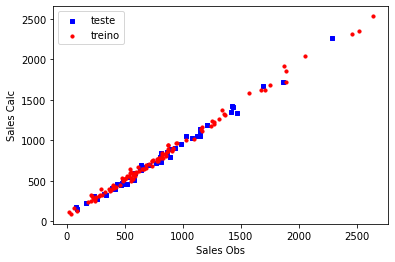

In [309]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Sales Calc')
plt.xlabel('Sales Obs')
plt.show()

In [310]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 2281.4894142258872
R^2 teste= 0.9888227905997644


In [311]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 2667.902887745798
R^2 treino= 0.9906469322384654


In [312]:
y_train= []
y_test= []
y_calc_train =np.array(y_calc_train).ravel()
y_calc_test = np.array(y_calc_test).ravel()
for yi in y_calc_train:
  y_train.append(yi)
for yi in y_calc_test:
  y_test.append(yi)

y_obs= []
y_obs_train =np.array(y_obs_train).ravel()
y_obs_test = np.array(y_obs_test).ravel()
for yi in y_obs_train:
  y_obs.append(yi)
for yi in y_calc_test:
  y_obs.append(yi)

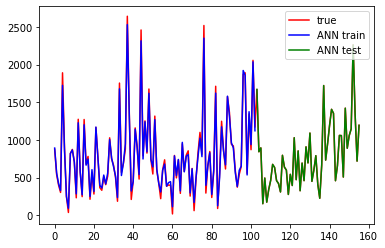

In [313]:
rows = len(y_obs)
ntrain = len(y_obs_train)
t = np.array(range(rows))
t_train= t[0:ntrain].copy()
#t_test=t[(ntrain-1):].copy()
t_test=t[ntrain:].copy()
line1, =plt.plot(range(len(y_obs)),y_obs,c='r')
line2, =plt.plot(t_train,y_train, c='b')
line3, =plt.plot(t_test,y_test, c='g')
plt.legend([line1,line2,line3],['true','ANN train','ANN test'],loc='upper right')
plt.show()

In [314]:
print(len(y_obs))
print(len(y_train))

156
103
